<a href="https://colab.research.google.com/github/fxop0218/PyTorchForBeginners/blob/main/03_PyTorch_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch computer vision

### Computer vision libraries

[torchvision](https://pytorch.org/vision/0.8/index.html)

* `torchvision.datasets`:  provides functions for loading and processing various datasets. These datasets can be used for training machine learning models or for evaluating the performance of a model.

* `torchvision.models`: Get pretrained computer vison models
* `torchvision.transform`: Functions to manipulatino your vision data
* `torch.utils.data.Dataset`: Base datasets for PyTorch
* `torch.utils.data.DataLoader`: Creates pyton iterable datasets

In [1]:
# Imports
import torch
import torchvision
import matplotlib.pyplot as plt
from torch import nn
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor

print(f"torch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

torch version: 1.13.0+cu116
torchvision version: 0.14.0+cu116


## 1. Getting a dataset

**🟦EN**: The dataset we will use will be the one from FashionMNIST

**🟥ES**: El primer set de datos que utilizaremos sera el de FashionMNIST

In [2]:
# Setup
train_data = datasets.FashionMNIST(
    root = "data", # The downloaded data is stored in
    train = True, 
    download = True, # True if want to download and false if not
    transform = ToTensor(), # How do we want to transform the data?
    target_transform=None # How dow we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
print(f"Train length: {len(train_data)} || Test length: {len(test_data)}")

Train length: 60000 || Test length: 10000


In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
classes = train_data.classes
classes_id = train_data.class_to_idx
# print(f"All classes names: {classes}")
print(f"All classes with their id's: {classes_id}")

All classes with their id's: {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [6]:
print(f"Image shape: {image.shape}[color chanel, heigth, width]\n")

Image shape: torch.Size([1, 28, 28])[color chanel, heigth, width]



[9, 0, 0, 3, 0, 2, 7, 2]


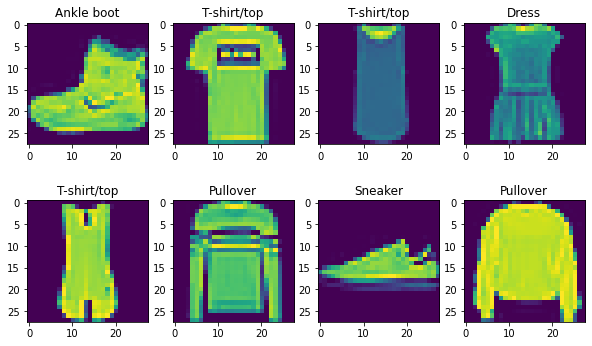

In [7]:
images = [train_data[i][0].squeeze() for i in range(8)]
labels = [train_data[i][1] for i in range(8)]

print(labels)

fig = plt.figure(figsize=(10, 6))
ax = fig.subplots(2, 4)

ax[0][0].imshow(images[0])
ax[0][0].set_title(classes[labels[0]])
ax[0][1].imshow(images[1])
ax[0][1].set_title(classes[labels[1]])
ax[0][2].imshow(images[2])
ax[0][2].set_title(classes[labels[2]])
ax[0][3].imshow(images[3])
ax[0][3].set_title(classes[labels[3]])
ax[1][0].imshow(images[4])
ax[1][0].set_title(classes[labels[4]])
ax[1][1].imshow(images[5])
ax[1][1].set_title(classes[labels[5]])
ax[1][2].imshow(images[6])
ax[1][2].set_title(classes[labels[6]])
ax[1][3].imshow(images[7])
ax[1][3].set_title(classes[labels[7]])

plt.show()

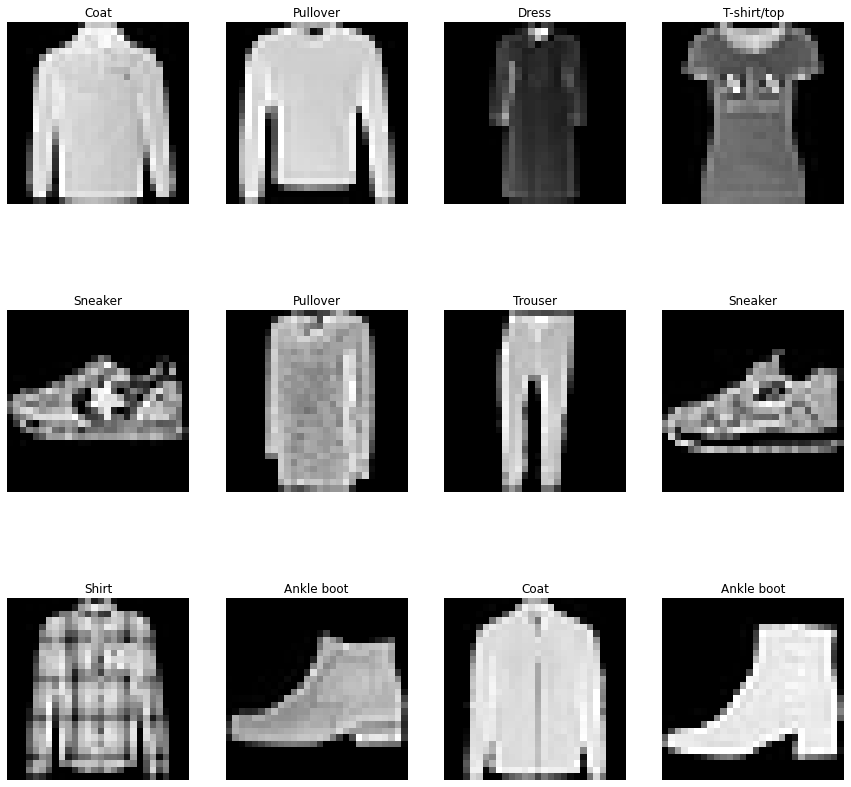

In [8]:
torch.manual_seed(10)

fig = plt.figure(figsize=(15, 15))
row = 3
col = 4

for i in range(1, row * col+1):
  random_index = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_index]
  fig.add_subplot(row, col, i)
  plt.title(classes[label])
  plt.imshow(img.squeeze(), cmap="gray")
  plt.axis(False)

## 2. Prepare DataLoader

**🟦EN**:  Data is in the form of PyTorch Datasets.

DataLoader transform our dataset into Pyton iterable

We want to turn our data into batches. 

Why would we do this??

1. It is more computationally efficient, as in, your computign hardware may not be able to llok at 6000 image in one hit. So we break it down to 32 images at a tiem (Batch size = 32)

2. It gives out neuronal network more chances to update its gradients per epochs.

**🟥ES**: Los datos están en forma de PyTorch Datasets.

DataLoader transforma nuestro dataset en iterable Pyton

Queremos convertir nuestros datos en lotes. 

¿Por qué haríamos esto?

1. Es más eficiente computacionalmente, como en, su hardware computign puede no ser capaz de llok en 6000 imagen en un hit. Así que lo dividimos en 32 imágenes a la vez (tamaño del lote = 32)

2. Esto da a nuestra red neuronal más oportunidades de actualizar sus gradientes por lote. 

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# DataSet into iterable
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)
print(f"Train DataLoader: {train_dataloader} Test dataloader: {test_dataloader}")
print(f"Length of train DataLoader: {len(train_dataloader)} with batch = {BATCH_SIZE}\nLength of test DataLoader {len(test_dataloader)} with batch = {BATCH_SIZE}")

Train DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x7fd3eb33f280> Test dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7fd3eb33f2e0>
Length of train DataLoader: 1875 with batch = 32
Length of test DataLoader 313 with batch = 32


In [10]:
# Check dataloader

train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f"Train features batch shape: {train_features_batch.shape}\ntrain labels bartch shape: {train_labels_batch.shape}")

Train features batch shape: torch.Size([32, 1, 28, 28])
train labels bartch shape: torch.Size([32])


Image size: torch.Size([1, 28, 28]) || Label: 0, label size: torch.Size([])


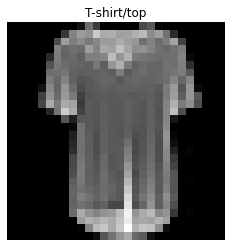

In [11]:
# Show exemple

random_index = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_index], train_labels_batch[random_index]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(classes[label])
plt.axis(False)

print(f"Image size: {img.shape} || Label: {label}, label size: {label.shape}")

# Build baseline model

**🟦EN**: When starting to build a series of ML modelling experimtents, it's best practice to start with baseline model. 

A *baseline* model is a simpele model you will try and imporove upon with subsequent models/experiments.

In this model we need a new layer, the [nn.Flatten](https://pytorch.org/docs/stable/generated/torch.flatten.html), Flattens input by reshaping it into a one-dimensional tensor. If start_dim or end_dim are passed, only dimensions starting with start_dim and ending with end_dim are flattened. The order of elements in input is unchanged.

**🟥ES**: Cuando se empieza a construir una serie de experimentos de modelización ML, la mejor práctica es empezar con un modelo de referencia. 

Un modelo *de referencia* es un modelo sencillo que se intentará mejorar con modelos/experimentos posteriores.

En este modelo necesitamos una nueva capa, la [nn.Flatten](https://pytorch.org/docs/stable/generated/torch.flatten.html), Aplana la entrada remodelándola en un tensor unidimensional. Si se pasa start_dim o end_dim, sólo se aplanan las dimensiones que comienzan con start_dim y terminan con end_dim. El orden de los elementos en la entrada no cambia.


In [12]:
# Let's see a flatten exemple
flatten_model = nn.Flatten()

# Get signle sample
X = train_features_batch[0]

# Flatten
output = flatten_model(X)

# Print resutl
print(f"Sample shape: {X.shape} || Flatten sample: {output.shape}")
print(f"Output: {output}")

Sample shape: torch.Size([1, 28, 28]) || Flatten sample: torch.Size([1, 784])
Output: tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0784, 0.4353, 0.2353, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2902,
         0.3529, 0.0235, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.2157,
         0.5137, 0.6118, 0.5765, 0.7922, 0.6706, 0.6863, 0.6235, 0.6431, 0.6902,
         0.7255, 0.5490, 0.6235, 0.4471, 0.1686, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2980,
         0.6157, 0.4941, 0.5412, 0.4745, 0.5294, 0.6157, 0.6118, 0.6706, 0.6235,
         0.5961, 0.4392, 0.5098, 0.4275, 0.4863, 0.6431, 0.2549, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.5020, 0.4000, 0.4353, 0.4196, 0.6157, 0.5137, 0.6588, 0.6314, 0.7529,
         0.6510, 0.5569

In [13]:
from torch import nn

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_units: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
    )

  def forward(self, x):
    return self.layer_stack(x)

In [14]:
INPUT = len(train_features_batch[1][0][0]) * len(train_features_batch[1][0][1])
OUTPUT = len(classes)

print(f"Input size: {INPUT} || Output: {OUTPUT}")

Input size: 784 || Output: 10


In [15]:
torch.manual_seed(10)

# Setup model with input parameters

model_v1 = FashionMNISTModelV1(
    input_shape=INPUT,
    output_shape=OUTPUT,
    hidden_units=30
).to("cpu")

In [16]:
dummy_ex = torch.rand([1, 1, 28, 28])
model_v1(dummy_ex)

tensor([[-0.2425,  0.2671, -0.5173, -0.1572, -0.3168,  0.3175,  0.1559, -0.0430,
         -0.2209,  0.2326]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

**🟦EN**:
* Loss function: since we're working with multiclass data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer: Out optimizer `torch.optim.SGD`
* Evaluation metric: Since we're working on  a classification problem, let's use accuracy as our evaluation metric.

**🟥ES*** 
* Función de pérdida: dado que trabajamos con datos multiclase, nuestra función de pérdida será `nn.CrossEntropyLoss()`.
* Optimizador: Optimizador de salida `torch.optim.SGD`.
* Métrica de evaluación: Dado que estamos trabajando en un problema de clasificación, vamos a utilizar la precisión como nuestra métrica de evaluación.

In [17]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v1.parameters(),
                            lr = 0.2)

In [19]:
# Calculate performance

from timeit import default_timer as timer

def train_time(start: float, end: float, device: torch.device = None):
  time = end - start
  print(f"Train time using {device} is {time:.5f}s")
  return time

In [20]:
start_time = timer()
end_time = timer()

train_time(start=start_time, end=end_time, device="cpu")

Train time using cpu is 0.00006s


6.052999999894837e-05

In [39]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### 3.3 Training loop

**🟦EN**

1. Loop through epochs.
2. Loop through training barches, perform training steps, calculate the train loss per batch
3. Loop through testing batches, perform testign stpes, calculate the test loss *per batch*
4. print what's happening

**🟥ES**

1. Recorrer las épocas.
2. 2. Recorrer los lotes de entrenamiento, realizar los pasos de entrenamiento, calcular la pérdida de tren por lote.
3. Recorrer los lotes de prueba, realizar los pasos de prueba, calcular la pérdida de prueba *por lote*.
4. imprimir lo que está sucediendo

In [40]:
from tqdm.auto import tqdm

# Set seed
torch.manual_seed(10)

# Start timer
train_time_cpu = timer()

# Number of epochs
epochs = 3

# Training loop and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n########")

  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    model_v1.train()
    # Forward pass
    y_pred = model_v1(X)

    # Claculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate test loss

    # Optimizer zero grad
    loss.backward()

    # Print info
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  
  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  # Test

  test_loss = 0
  test_acc = 0
  model_v1.eval()
  
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Forward pass
      test_pred = model_v1(X_test)

      # Caluclate loss
      test_loss += loss_fn(test_pred, y_test)
      
      # Calcualte accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss avarage per barch.
    test_loss /= len(test_dataloader)

    # Calculate the test acc avarage per batch  
    test_acc /= len(test_dataloader)

  # Print infromation

  print(f"Train loss: {train_loss:.6f} | Test loss: {test_loss:.6f}, Test acc: {test_acc:.3f}")

train_time_cpu_end = timer()
total_time_modelV1 = train_time(train_time_cpu, train_time_cpu_end, str(next(model_v1.parameters())))
print("##############################################")
print(f"Total training time: {total_time_modelV1:.4f}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
########
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 2.339956 | Test loss: 2.339904, Test acc: 8.706
Epoch: 1
########
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 2.339958 | Test loss: 2.340096, Test acc: 8.686
Epoch: 2
########
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 2.339956 | Test loss: 2.340003, Test acc: 8.686
Train time using Parameter containing:
tensor([[-0.0030, -0.0012, -0.0134,  ...,  0.0073, -0.0113, -0.0107],
        [ 0.0324, -0.0162,  0.0237,  ..., -0.0225,  0.0342, -0.0059],
        [-0.0313,  0.0035,  0.0126,  ...,  0.0252,  0.0233,  0.0279],
        ...,
        [-0.0235, -0.0243, -0.0087,  ...,  0.0260,  0.0315, -0.007

# 4. Make prediction of model v1

In [52]:
torch.manual_seed(10)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns dictionary with the results of the model"""

  loss, acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      # Make predictions
      y_pred = model(X)

      # Accumulate the los and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    
    # Scale loss and acc to find the avarage loss/acc per batch
    print(len(data_loader))
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # Only wotks when model was created with
          "model_loss": loss.item(),
          "model_acc": acc}

In [53]:
# Calculate model v1 results on test data
model_v1_res = eval_model(model=model_v1,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)

model_v1_res

313


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 2.3398780822753906,
 'model_acc': 8.706070287539935}

**🟦EN**

**🟥ES**